# 2 Basic Kinematics of Mobile Robots 


http://wiki.ros.org/tf2/Tutorials/Quaternions#Think_in_RPY_then_convert_to_quaternion

Estimated time to completion: 3 hours

In this Unit, you will learn the basic concepts for representing the position and orientation of rigid bodies in 3D:

1. Frames of reference
2. zsdfRepresenting positions
3. Representing rotations
4. Rotational transformations
5. Composition of rotations
6. Parameterization of rotations
7. Homogeneous transformation matrices


[1] Spong, M. W., Vidyasagar, M. (2008). Robot dynamics and control, chapter 2. John Wiley & Sons.

## **2.1   Frame of reference**


In [ ]:
import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion

## **2.2  Representing positions**


In [ ]:
spawn_coke_can('coke_can', Pose(position=Point(0,1,0)))

The function spawn_coke_can takes two arguments; the name of the object, which must be unique, and its position in the world.

The position of the can has been given in a Pose object. It is displaced one grid square (1m) along the Y-axis (the green one) with respect to the origin, so its position is:

```
𝑝=[0,1,0]𝑇
```
Let's see the value given by the simulator:

Positions are represented by the Cartesian coordinates of a point p in relation to an arbitrary origin O (in our case, the center of the robot).

Let's see a practical example by adding a new object to our simulation: click on the next cell and execute it by pressing Shift + Enter and a can of Coke will be spawned.

In [ ]:
model_state = get_model_state('coke_can')
model_state.pose.position

x: -2.00497448895e-05
y: 0.999862057585
z: -0.00265887687413

* The value is not exact due to the uncertainty and noise present in the model.

The simulator allows us to change the position of an object, so we can relocate our can in any other position with the following code. For example, the can will be moved in front of the robot if we set its (X, Y, Z) coordinates to (1, 0, 0):

In [ ]:
new_pose = Pose(position=Point(1,0,0))
set_model_state('coke_can', new_pose)

## **2.3   Representing rotations** 


The relative position and orientation of one rigid body with respect to another can be represented by the geometric relationships between the coordinate frames attached to each body.

> The relative position is given by a point, as described in the previous section. Let's see how to represent the orientation in 2D and 3D.

> In two dimensions, given an angle of rotation  𝜃  between two reference systems, the coordinates

```
(𝑥′,𝑦′)𝑇 
```
 

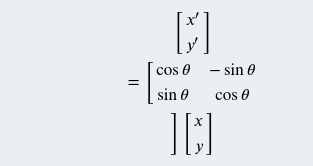

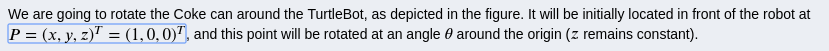

In [ ]:
x, y, z = 1, 0, 0
for angle in range(0,360,10):
    theta = math.radians(angle)
    xp = x * math.cos(theta) - y * math.sin(theta)
    yp = x * math.sin(theta) + y * math.cos(theta)
    set_model_state('coke_can', Pose(position=Point(xp,yp,z)))
    rospy.sleep(0.1)

In [ ]:
import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion


x, y, z = 1, 0, 0
for angle in range(0,360,10):
    theta = math.radians(angle)
    xp = x * math.cos(theta) - y * math.sin(theta)
    yp = x * math.sin(theta) + y * math.cos(theta)
    set_model_state('coke_can', Pose(position=Point(xp,yp,z)))
    rospy.sleep(0.1)

In the previous code, we convert the angle from degrees to radians with the [Python function math.radians. The value of the angle is used for computing the coordinates of the point in the rotated frame with the Python trigonometric functions. Finally, the new coordinates are used for setting the position of the coke_can model in the simulation. 
[math.radians](https://docs.python.org/2/library/math.html#angular-conversion)



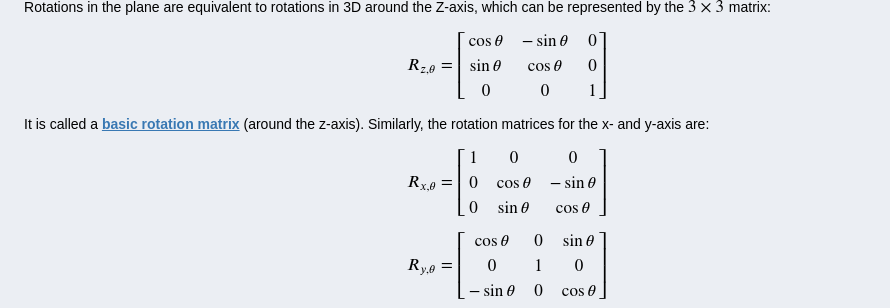

## **2.4   Rotational transformations**


If the rotation is applied to all the points of a rigid object, then the whole object is rotated. Consequently, the orientation of a rigid object can be completely represented by the rotations of a reference frame rigidly attached to it.


Let's see this with an example: we will rotate the TurtleBot around its z-axis.



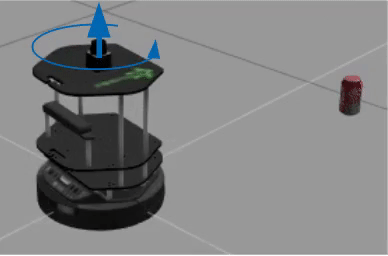

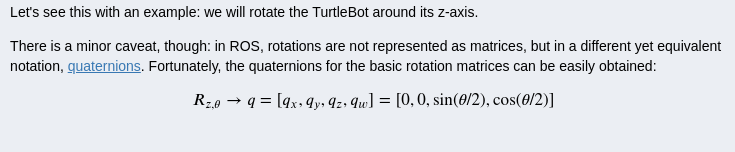

In [ ]:
position = Point(x=0, y=0, z=0)
for angle in range(0,360,10):
    theta = math.radians(angle)
    orientation = Quaternion(x=0, y=0, z=math.sin(theta/2), w=math.cos(theta/2))
    set_model_state('mobile_base', Pose(position, orientation))
    rospy.sleep(0.1)

Rotating the TurtleBout around its x- and y-axis is not a good idea, but we can make some interesting rotation experiments with the Coke can. The equivalent quaternions of the other basic rotation matrices are:

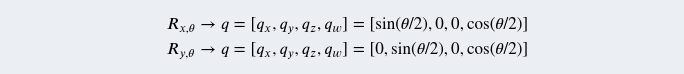

The code in the cells below rotates the Coke can around its Z-axis: try it, and make the changes for rotating around the other axes.

* To better visualize the rotations, the can will float in the air at a height of 0.5 m, so you should **deactivate gravity by running the next cell.**

In [ ]:
pause_physics()

In [ ]:
position = Point(x=0.5, y=0, z=0.5)

In [ ]:
from tf.transformations import quaternion_about_axis

We don't need to compute explicitly the quaternion, a ROS function can be used instead:


```
tf.transformations.quaternion_about_axis(angle, axis)

```



tf.transformations.quaternion_about_axis(angle, axis)
where  𝑎𝑛𝑔𝑙𝑒  is the value in radians of the rotated angle, which can be positive or negative, and  𝑎𝑥𝑖𝑠  is a 3-element tuple with the coordinates in 3D of a vector, the axis of rotation. If this axis is parallel to any of the principal axes, its components are 1 for that axis, and 0 for the other two axes.



https://numpy.org/doc/stable/reference/generated/numpy.array.html

http://docs.ros.org/melodic/api/geometry_msgs/html/msg/Quaternion.html

However, the result of this function is a numpy array that must be converted into a ROS Quaternion object, with the statement:

```
orientation = Quaternion(*q)
```

Let's first rotate the can about the Z-axis  (0,0,1) , the blue arrow in the figure:

In [ ]:
for angle in range(0,360,10):
    theta = math.radians(angle)
    q = quaternion_about_axis(theta, (0,0,1))
    orientation = Quaternion(*q)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.1)

In [ ]:
import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion
from tf.transformations import quaternion_about_axis

position = Point(x=0.5, y=0, z=0.5)

for angle in range(0,360,10):
    theta = math.radians(angle)
    q = quaternion_about_axis(theta, (0,0,1))
    orientation = Quaternion(*q)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.1)

## **2.5   Composition of rotations**


A sequence of rotations can be applied to an object; for example, we might rotate the Coke can first around the x-axis, then around the y-axis, but we have two choices:

1. Rotation with respect to the current coordinate frame (intrinsic)
2. Rotation with respect to a fixed frame (extrinsic)

Let's see a practical example:

> **1. The first rotation is 90º around the y-axis:**

In [ ]:
for angle in range(0,90,3):
    q_y = quaternion_about_axis(math.radians(angle), (0,1,0))
    orientation = Quaternion(*q_y)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.1)

> **2. The second rotation is 90º around the z-axis:**



In [ ]:
q_z = quaternion_about_axis(math.radians(90), (0,0,1))

In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion
from tf.transformations import quaternion_about_axis

position = Point(x=0.5, y=0, z=0.5)

for angle in range(0,90,3):
    q_z = quaternion_about_axis(math.radians(90), (0,0,1))
    orientation = Quaternion(*q_z)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.1)

But how are rotations composed? Rotation matrices are multiplied, and so are quaternions.

In [ ]:
from tf.transformations import quaternion_multiply

Yet the order of multiplication matters!

If we post-multiply, the Z rotation is intrinsic, it is applied to the current coordinate frame (the can rotates about the axis of the cylinder).

In the figure, you can see how the can first rotates about the y-axis, then it rotates about its own z-axis.

In [ ]:
for angle in range(0,90,3):
    q_z = quaternion_about_axis(math.radians(angle), (0,0,1))
    q_yz = quaternion_multiply(q_y, q_z)
    orientation = Quaternion(*q_yz)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.1)

In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion

from tf.transformations import quaternion_multiply
from tf.transformations import quaternion_about_axis

position = Point(x=0.5, y=0, z=0.5)

for angle in range(0,90,3):
    q_y = quaternion_about_axis(math.radians(90), (0,1,0))
    q_z = quaternion_about_axis(math.radians(angle), (0,0,1))
    q_yz = quaternion_multiply(q_y, q_z)
    orientation = Quaternion(*q_yz)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.1)

In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion

from tf.transformations import quaternion_about_axis

from tf.transformations import quaternion_multiply

position = Point(x=0.5, y=0, z=0.5)

for angle in range(0,90,3):
    q_y = quaternion_about_axis(math.radians(90), (0,1,0))
    q_z = quaternion_about_axis(math.radians(angle), (0,0,1))
    q_zy = quaternion_multiply(q_z, q_y)
    orientation = Quaternion(*q_zy)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.1)

## **2.6   Parameterization of rotations**


Rotation matrices and quaternions are very suitable for computation, but there are other methods of specifying a rotation with angles, which can be more user-friendly and easier to visualize.

In fact, a rigid body has only three rotational degrees-of-freedom, therefore, only three values are required to specify its orientation.

### **1. Euler angles**

Euler angles are typically denoted as α, β, γ, or φ, θ, ψ. Different authors may use different sets of rotation axes to define Euler angles, or different names for the same angles.

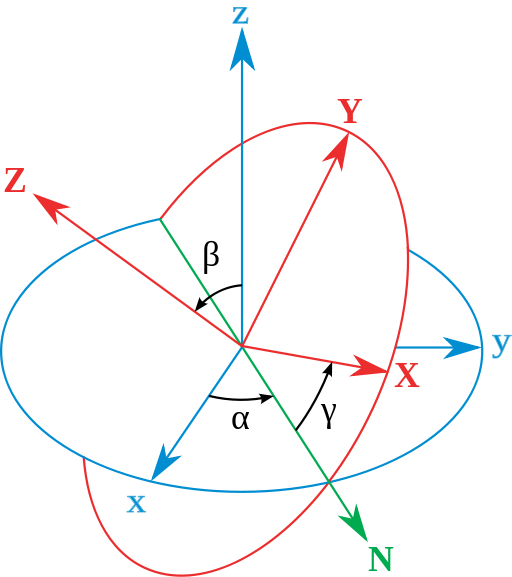

The axes of the original frame (blue in the figure) are denoted as x, y, z and the axes of the rotated frame (red in the figure) as X, Y, Z. The transformation between frames is obtained by three successive rotations as follows:

1. Rotate about the z-axis by the angle  𝛼 
2. Rotate about the current x-axis by the angle  𝛽 
3. Rotate about the current z-axis by the angle  𝛾

This is only one of the six possibilities of choosing the rotation axes for proper Euler angles. In all of them, the first and third rotation axes are the same.

https://en.wikipedia.org/wiki/Euler_angles#Conventions

### **2. Roll, Pitch, Yaw angles (RPY)**

A rotation can also be described as three successive rotations defined by the roll, pitch, and yaw angles, denoted by  𝜙,𝜃,𝜓  (also known as Tait-Bryan angles).

https://en.wikipedia.org/wiki/Euler_angles#Tait%E2%80%93Bryan_angles



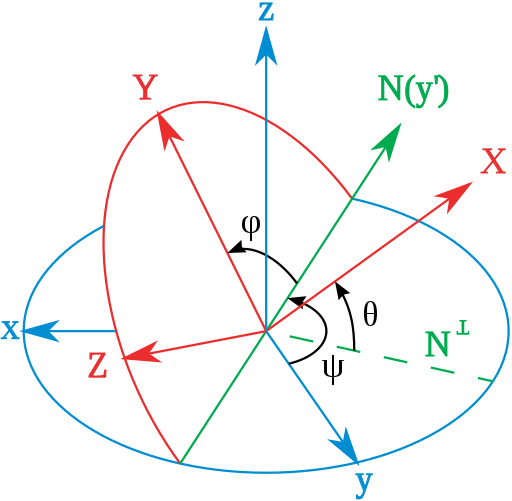

The definitions and notations used for RPY angles are similar to those described above for proper Euler angles. The only difference is that RPY angles represent rotations about three distinct axes (e.g. x-y-z, or x-y′-z″), while proper Euler angles use the same axis for both the first and third elemental rotations (e.g., z-x-z, or z-x′-z″).

As before, there are six possibilities of choosing the rotation axes.

https://en.wikipedia.org/wiki/Euler_angles#Conventions_2

### **3. Axis / Angle representation**


This representation parameterizes a rotation in 3D space by two quantities: a unit vector e indicating the direction of an axis of rotation, and an angle θ describing the magnitude of the rotation about the axis.



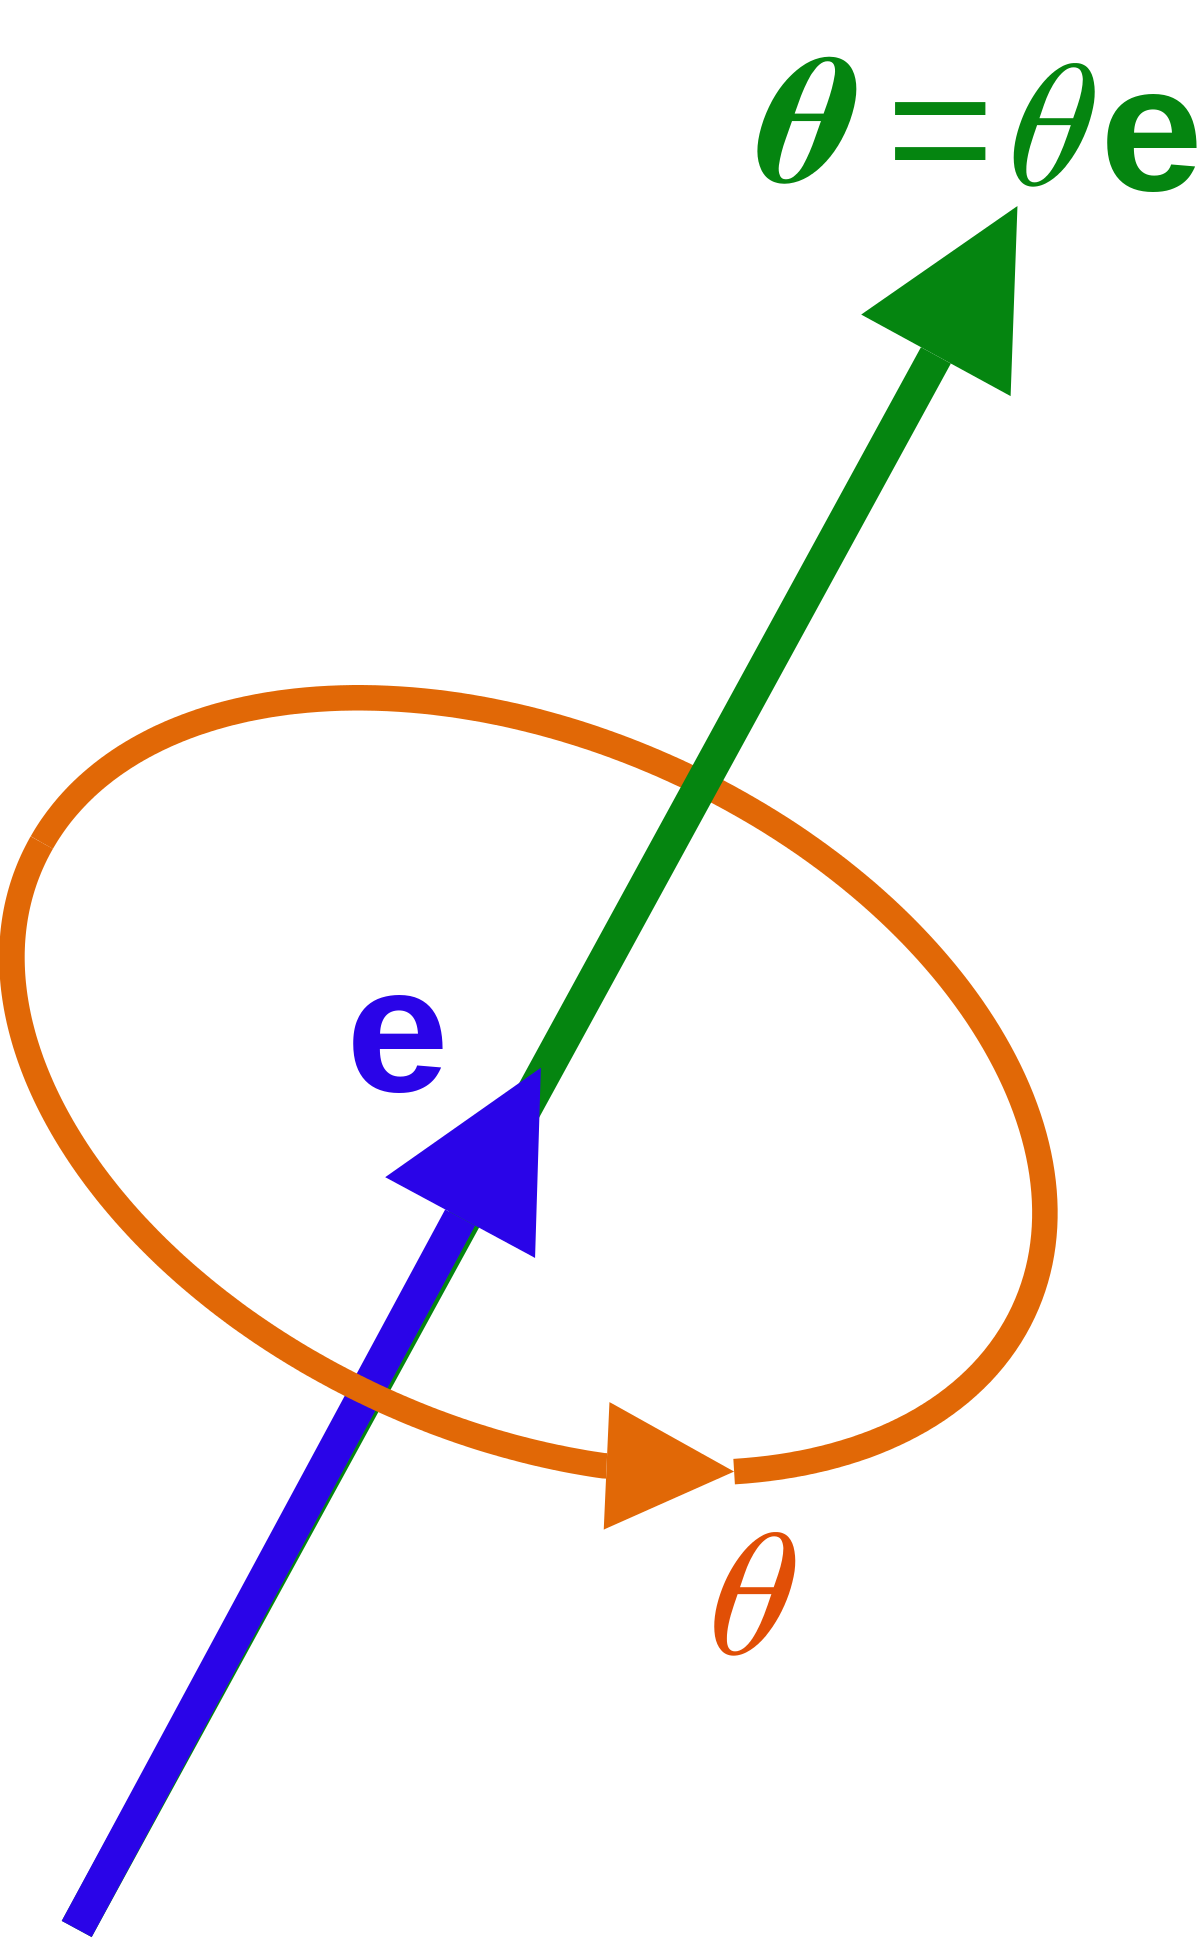

https://en.wikipedia.org/wiki/Euler%27s_rotation_theorem

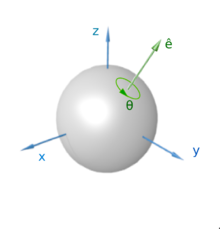

The axis–angle representation is derived from Euler's rotation theorem, which states that any rotation or sequence of rotations of a rigid body in 3D space is equivalent to a pure rotation about a single fixed axis.

## Advice from ROS gurus: Think in RPY then convert to quaternion


ROS uses quaternions to track and apply rotations, but it's easier for humans to think of rotations about axes. A suggestion is to calculate target rotations in terms of (roll about an X-axis) / (subsequent pitch about the Y-axis) / (subsequent yaw about the Z-axis), then convert to a quaternion:



In [ ]:
spawn_coke_can('coke_can', Pose(position=Point(0,1,0)))

In [ ]:
model_state = get_model_state('coke_can')
model_state.pose.position

In [ ]:
new_pose = Pose(position=Point(1,0,0))
set_model_state('coke_can', new_pose)

In [ ]:
from tf.transformations import quaternion_from_euler
# RPY to convert: 90deg, 0, -90deg
q = quaternion_from_euler(math.radians(90), 0, math.radians(-90))
Quaternion(*q)

In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion

from tf.transformations import quaternion_from_euler


rospy.init_node('euler')

# RPY to convert: 90deg, 0, -90deg
q = quaternion_from_euler(math.radians(90), 0, math.radians(-90))
Quaternion(*q)
rospy.loginfo(Quaternion(*q))


Let's practice with the Coke can; 

feel free to modify the angles and check the results in the simulator window.

In [ ]:
position = Point(x=0.5, y=0, z=0.5)
roll, pitch, yaw = 90, 0, -90

In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion

from tf.transformations import quaternion_from_euler

rospy.init_node('euler2')

position = Point(x=0.5, y=0, z=0.5)
roll, pitch, yaw = 90, 0, -90

q_rpy = quaternion_from_euler(math.radians(roll), math.radians(pitch), math.radians(yaw))
orientation = Quaternion(*q_rpy)
set_model_state('coke_can', Pose(position, orientation))
orientation

rospy.loginfo(orientation)


**And this is the result from the step-by-step composition of RPY rotations:**

In [ ]:
q_x = quaternion_about_axis(0, (1,0,0))

if roll>=0:
    roll_range = range(0,roll,1)
    offset = 1
else:
    roll_range = range(0,roll,-1)
    offset = -1
for roll_angle in roll_range:
    q_x = quaternion_about_axis(math.radians(roll_angle+offset), (1,0,0))
    orientation = Quaternion(*q_x)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.01)

q_y = quaternion_about_axis(0, (0,1,0))
q_xy = quaternion_multiply(q_y, q_x)

if pitch>=0:
    pitch_range = range(0,pitch,1)
    offset = 1
else:
    pitch_range = range(0,pitch,-1)
    offset = -1
for pitch_angle in pitch_range:
    q_y = quaternion_about_axis(math.radians(pitch_angle+offset), (0,1,0))
    q_xy = quaternion_multiply(q_y, q_x)
    orientation = Quaternion(*q_xy)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.01)

q_z = quaternion_about_axis(0, (0,0,1))
q_xyz = quaternion_multiply(q_z, q_xy)

if yaw>=0:
    yaw_range = range(0,yaw,1)
    offset = 1
else:
    yaw_range = range(0,yaw,-1)
    offset = -1
for yaw_angle in yaw_range:
    q_z = quaternion_about_axis(math.radians(yaw_angle+offset), (0,0,1))
    q_xyz = quaternion_multiply(q_z, q_xy)
    orientation = Quaternion(*q_xyz)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.01)
orientation

In [ ]:
x: 0.5
y: -0.4999999999999999
z: -0.5
w: 0.5000000000000001


In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion

from tf.transformations import quaternion_about_axis
from tf.transformations import quaternion_multiply

from tf.transformations import quaternion_from_euler

rospy.init_node('euler3')

position = Point(x=0.5, y=0, z=0.5)
roll, pitch, yaw = 90, 0, -90

q_x = quaternion_about_axis(0, (1,0,0))

if roll>=0:
    roll_range = range(0,roll,1)
    offset = 1
else:
    roll_range = range(0,roll,-1)
    offset = -1
for roll_angle in roll_range:
    q_x = quaternion_about_axis(math.radians(roll_angle+offset), (1,0,0))
    orientation = Quaternion(*q_x)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.01)

q_y = quaternion_about_axis(0, (0,1,0))
q_xy = quaternion_multiply(q_y, q_x)

if pitch>=0:
    pitch_range = range(0,pitch,1)
    offset = 1
else:
    pitch_range = range(0,pitch,-1)
    offset = -1
for pitch_angle in pitch_range:
    q_y = quaternion_about_axis(math.radians(pitch_angle+offset), (0,1,0))
    q_xy = quaternion_multiply(q_y, q_x)
    orientation = Quaternion(*q_xy)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.01)

q_z = quaternion_about_axis(0, (0,0,1))
q_xyz = quaternion_multiply(q_z, q_xy)

if yaw>=0:
    yaw_range = range(0,yaw,1)
    offset = 1
else:
    yaw_range = range(0,yaw,-1)
    offset = -1
for yaw_angle in yaw_range:
    q_z = quaternion_about_axis(math.radians(yaw_angle+offset), (0,0,1))
    q_xyz = quaternion_multiply(q_z, q_xy)
    orientation = Quaternion(*q_xyz)
    set_model_state('coke_can', Pose(position, orientation))
    rospy.sleep(0.01)

orientation

rospy.loginfo(orientation)


## **2.7   Homogeneous transformation matrices**


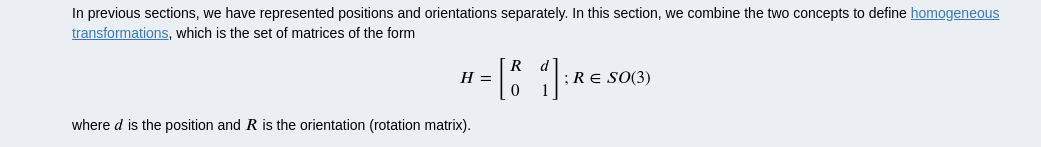


The use of homogeneous matrices greatly simplifies the operations with rigid motions, and they are extensively used in the field of computer graphics.


> However, since ROS uses quaternions instead of rotation matrices, 
>> we will use the equivalent data structure Pose, consisting of a position vector and a orientation quaternion.

> The Pose data structure can be easily converted into and from an homogeneous matrix:



In [ ]:
import numpy as np
from tf.transformations import quaternion_matrix

model_state = get_model_state('coke_can')
pose = model_state.pose
q = np.array([pose.orientation.x, pose.orientation.y, 
              pose.orientation.z, pose.orientation.w])
H = quaternion_matrix(q)
H[0][3] = pose.position.x
H[1][3] = pose.position.y
H[2][3] = pose.position.z

In [ ]:
print(pose)

In [ ]:
position: 
  x: 0.502303836573
  y: 0.0176331418829
  z: 0.0338265333971
orientation: 
  x: 0.201547685254
  y: -0.675998389021
  z: -0.334043330815
  w: 0.625155789982

In [ ]:
print(H)

In [ ]:
[[-0.13711754  0.14516642 -0.97985993  0.50230384]
 [-0.69015007  0.69558717  0.1996281   0.01763314]
 [ 0.71055729  0.70362291  0.00480942  0.03382653]
 [ 0.          0.          0.          1.        ]]

In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state, get_model_state, \
                      spawn_coke_can, spawn_table, \
                      pause_physics, unpause_physics
from geometry_msgs.msg import Pose, Point, Quaternion
from tf.transformations import quaternion_from_euler

import numpy as np
from tf.transformations import quaternion_matrix

model_state = get_model_state('coke_can')
pose = model_state.pose

q = np.array([pose.orientation.x, pose.orientation.y, 
              pose.orientation.z, pose.orientation.w])
H = quaternion_matrix(q)
H[0][3] = pose.position.x
H[1][3] = pose.position.y
H[2][3] = pose.position.z

print(pose)

print(H)

## **Exercise 2.2**


The next cell spawns the table and Coke cans. Each can must have a different model name: we use the names coke_can_n with  𝑛 between 0 and 11.

**Before spawning the objects, let's restart the physics of the simulator for to have more fun!**

In [ ]:
unpause_physics()
spawn_table('table', Pose(position=Point(1,0,0)))

In [ ]:
for i in range(12):
    spawn_coke_can('coke_can_'+str(i), Pose(position=Point(0,0,1)))
    rospy.sleep(1.0)

In [ ]:
rosservice call /gazebo/get_world_properties "{}"

### **place_table.py**

In [ ]:
#! /usr/bin/env python

import math, rospy
from utilities import set_model_state
from geometry_msgs.msg import Pose, Point, Quaternion
from tf.transformations import quaternion_about_axis, quaternion_multiply

position = Point(1,0,0)
q = quaternion_about_axis(math.radians(90), (0,0,1))
orientation = Quaternion(*q)
set_model_state('table', Pose(position, orientation))

### **place_coke.py**

In [ ]:
#! /usr/bin/env python

import math, rospy
from tf.transformations import quaternion_about_axis, quaternion_multiply
from utilities import set_model_state
from geometry_msgs.msg import Pose, Point, Quaternion

for angle in range(0,360,30):
    can = angle/30
    theta = math.radians(angle)
    xp = 0.2 * math.cos(theta) + 1
    yp = 0.2 * math.sin(theta)
    model_name = 'coke_can_' + str(can)
    position = Point(xp,yp,1.05)
    q_z = quaternion_about_axis(theta, (0,0,1))
    q_y = quaternion_about_axis(math.radians(90), (0,1,0))
    q_zy = quaternion_multiply(q_z, q_y)
    orientation = Quaternion(*q_zy)
    set_model_state(model_name, Pose(position, Quaternion(*q_zy)))
    rospy.sleep(0.1)